In [1]:
import numpy as np
import matplotlib.pyplot as plt

height = 1001
width = 1001
r=4
step_size=1
max_moves = 1000000
too_far_threshold = 20 


In [2]:
def point_generator(tree,too_far_threshold):
    """Spawn a new particle randomly on a ring around the current tree."""
    center = np.mean(tree, axis=0)
    distances = np.sqrt(np.sum((tree - center)**2, axis=1))
    max_dist = np.max(distances)

    # Spawn on a circle outside the current tree
    radius = max_dist * 1.2+10
    angle = np.random.uniform(0, 2*np.pi)  # random angle every time

    y = int(center[0] + radius * np.sin(angle))
    x = int(center[1] + radius * np.cos(angle))

    # Keep inside canvas
    y = np.clip(y, 0, height-1)
    x = np.clip(x, 0, width-1)

    return np.array([[y, x]])

def point_movement(point, step_size):
        y, x = point[0] 
        angle = np.random.uniform(0, 2 * np.pi)
        dx = round(step_size * np.cos(angle))
        dy = round(step_size * np.sin(angle))
        new_y = np.clip(y + dy, 0, height - 1)
        new_x = np.clip(x + dx, 0, width - 1)
        new_point = np.array([[new_y, new_x]])  
        return new_point

In [3]:
canvas = np.zeros((width,height, 3), dtype=np.uint8)
canvas[:] = [0, 0, 255]

tree = np.array([[height//2, width//2],])

new_point = point_generator(tree,too_far_threshold)

In [4]:
for move_count in range(max_moves): 
    distance = np.sqrt(np.sum((tree - new_point)**2, axis=1)) 

    if np.any(distance <= r * 2): 
        tree = np.vstack([tree, new_point]) 
        print("Condition: SATISFIED (Point added and cleared)")

        # Recalculate thresholds dynamically
        center = np.mean(tree, axis=0) 
        distances = np.sqrt(np.sum((tree - center) ** 2, axis=1)) 
        max_dist = np.max(distances) 
        too_far_threshold = 40 + max_dist * 1.5

        # Spawn the next new point 
        new_point = point_generator(tree, too_far_threshold)  
        

    elif np.all(distance > too_far_threshold): 
        print("Too far away (Point rejected)") 
        new_point = point_generator(tree, too_far_threshold)

    else: 
        new_point = point_movement(new_point, step_size) 




Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Condition: SATISFIED (Point added and cleared)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Condition: SATISFIED (Point added and cleared)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Too far away (Point rejected)
Condition: SATISFIED (Point added and cleared)
Condition: S

KeyboardInterrupt: 

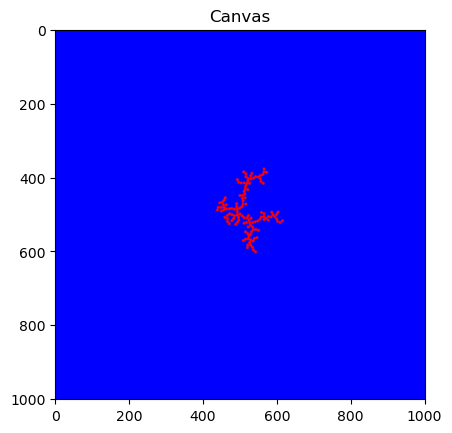

In [ ]:
path = np.array(path)

Y, X = np.ogrid[:height, :width]

for y, x in tree:
    mask = (X - x)**2 + (Y - y)**2 <= r**2
    canvas[mask] = [255, 0, 0]

plt.imshow(canvas)
plt.title('Canvas') 
plt.axis('on') 
plt.show()
